## Load Dataset

In [8]:
import mltable
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("YouTubeSpamCollection", version="1")

path = {
  'folder': data_asset.path
}

tbl = mltable.from_delimited_files(paths=[path])
df = tbl.to_pandas_dataframe()
df

Found the config file in: /config.json
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/azureml/dataprep/api/_dataframereader.py:251: UserWarning: Using alternate reader. Inconsistent or mixed schemas detected across partitions: partition had different number of columns. The first partition has 5 columns. Found partition has 6 columns.
First partition columns (ordered): ['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS']
Found Partition has columns (ordered): ['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS', 'Column6']
  warnings.warn("Using alternate reader. " + reason)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Column6
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",True,None
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07 12:37:15,Hey guys check out my new channel and our firs...,True,None
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08 17:34:21,just for test I have to say murdev.com,True,None
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,True,None
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,True,None
...,...,...,...,...,...,...
1956,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,NaT,I love this song because we sing it at Camp al...,False,None
1957,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,NaT,I love this song for two reasons: 1.it is abou...,False,None
1958,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,NaT,wow,False,None
1959,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,NaT,Shakira u are so wiredo,False,None


## Explain Dataset

In [10]:
# View basic information about the dataset
print(df.info())

# View the first few rows of the data
print(df.head())

# View descriptive statistics for each column in the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   COMMENT_ID  1961 non-null   object        
 1   AUTHOR      1961 non-null   object        
 2   DATE        702 non-null    datetime64[ns]
 3   CONTENT     1961 non-null   object        
 4   CLASS       1960 non-null   object        
 5   Column6     1 non-null      object        
dtypes: datetime64[ns](1), object(5)
memory usage: 92.0+ KB
None
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                 DATE               

## Category Distribution Maps
Goal: To understand the distribution of spammy comments (Spam) and non-spammy comments (Ham) in the dataset.

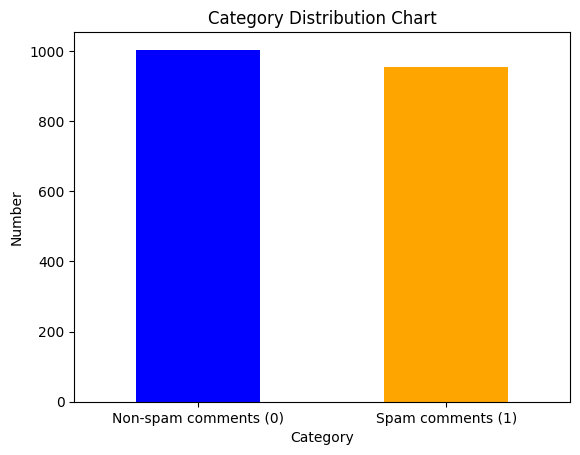

In [13]:
import matplotlib.pyplot as plt

# Calculate the counts for each class
class_counts = df['CLASS'].value_counts()

# Plot the distribution of categories
plt.plot(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Category Distribution Chart')
plt.xlabel('Category')
plt.ylabel('Number')
plt.xticks([0, 1], ['Non-spam comments (0)', 'Spam comments (1)'], rotation=0)
plt.show()

## Distribution of comment lengths
Goal: Analyze the distribution of the length (in words) of each comment to help understand the complexity of comment content.

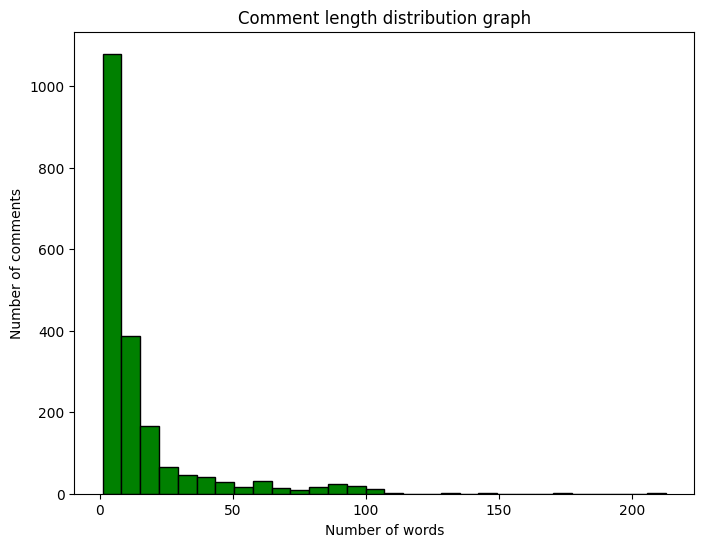

In [14]:
# Calculate the length of each comment
df['comment_length'] = df['CONTENT'].apply(lambda x: len(x.split()))

# Plot the distribution of comment lengths
plt.figure(figsize=(8, 6))
plt.hist(df['comment_length'], bins=30, color='green', edgecolor='black')
plt.title('Comment length distribution graph')
plt.xlabel('Number of words')
plt.ylabel('Number of comments')
plt.show()

## The Most Common Words in Spam and Non-Spam Comments
Goal: Identify the most common words used in spam and non-spam comments to help understand which words are more likely to appear in spam comments

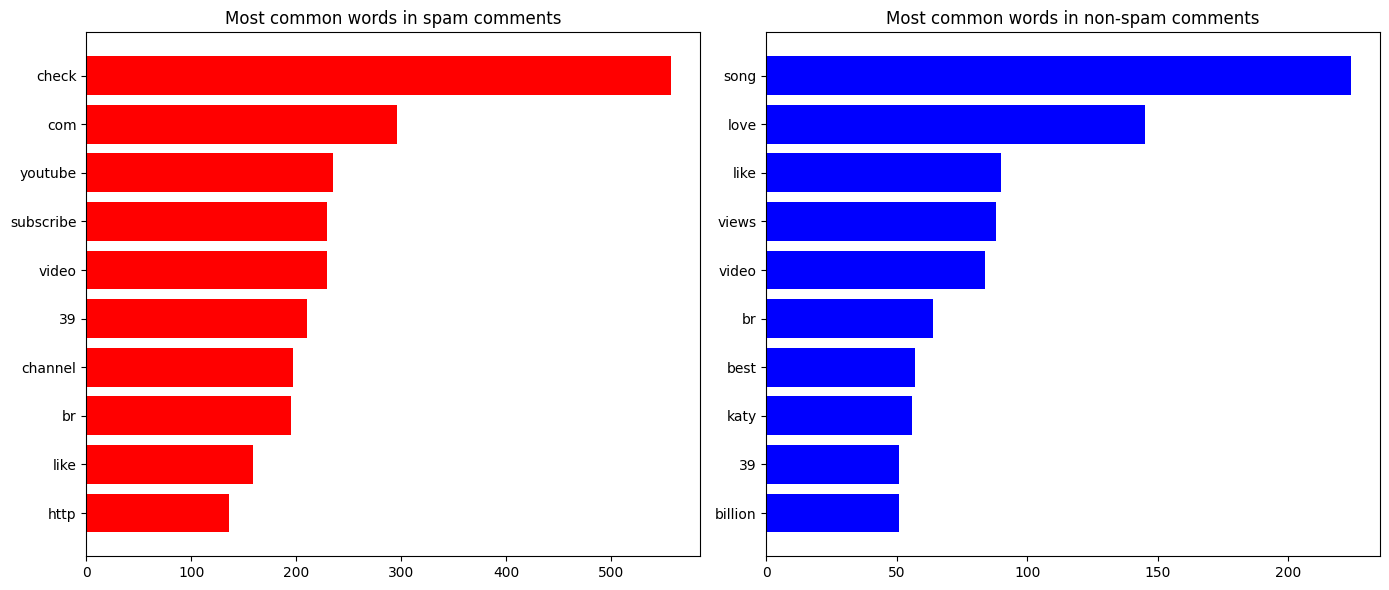

In [15]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Separate spam comments from non-spam comments
spam_comments = df[df['CLASS'] == 1]['CONTENT']
non_spam_comments = df[df['CLASS'] == 0]['CONTENT']

# Function to get the most common words
def get_most_common_words(text, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(text)
    word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
    return word_counts.most_common(n)

# Most common words in spam comments
spam_words = get_most_common_words(spam_comments)
non_spam_words = get_most_common_words(non_spam_comments)

# Plot the most common words
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].barh([word for word, _ in spam_words], [count for _, count in spam_words], color='red')
axs[0].set_title('Most common words in spam comments')
axs[0].invert_yaxis()

axs[1].barh([word for word, _ in non_spam_words], [count for _, count in non_spam_words], color='blue')
axs[1].set_title('Most common words in non-spam comments')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Word cloud of spam comments
Goal: Visualize the most common words in spam comments through a word cloud, visualizing the keywords of the text.

In [1]:
!pip install wordcloud

In [2]:
import sys
print(sys.path)
!pip show wordcloud


['/anaconda/envs/azureml_py310_sdkv2/lib/python310.zip', '/anaconda/envs/azureml_py310_sdkv2/lib/python3.10', '/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/lib-dynload', '', '/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages', '/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/azureml/_project/vendor']
Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /anaconda/envs/azureml_py38/lib/python3.9/site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [5]:
import sys
!{sys.executable} -m pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 9.3 MB/s eta 0:00:00ta 0:00:01


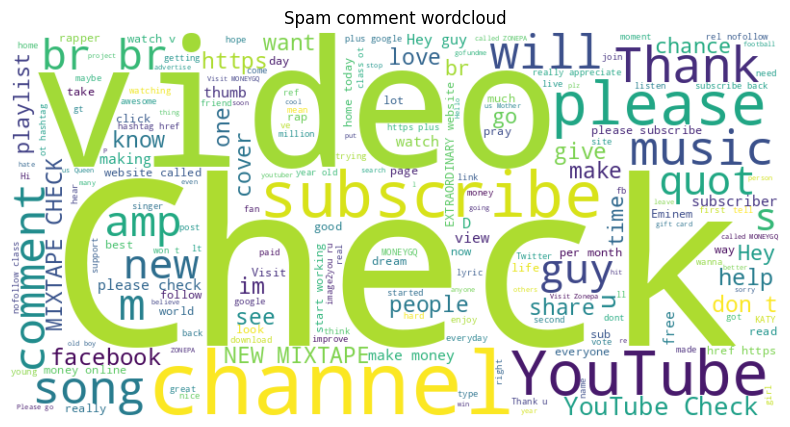

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract spam comments
spam_comments = df[df['CLASS'] == 1]['CONTENT'].tolist()
spam_text = " ".join(spam_comments)

spam_text = " ".join(spam_comments)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam comment wordcloud')
plt.show()

## TF-IDF Feature Importance
Goal: To analyze which terms have higher importance in the classification of spam comments and help understand the decision basis of the model.

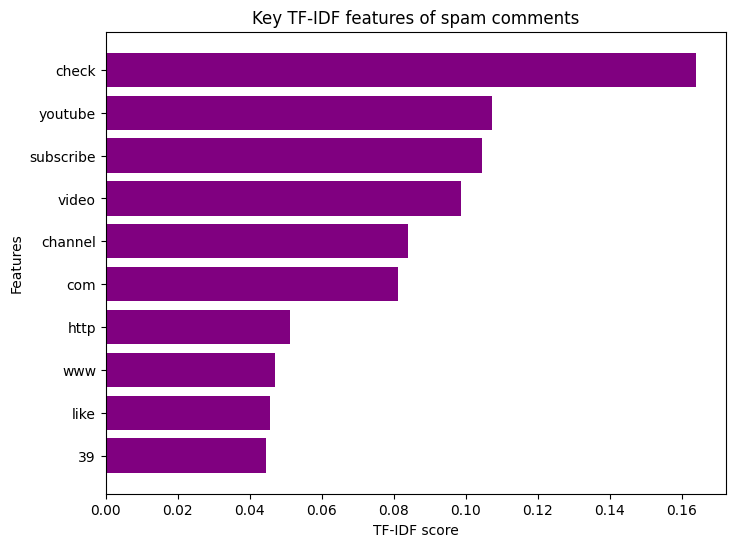

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
X = tfidf.fit_transform(df['CONTENT'])

# Get TF-IDF features for spam comments
spam_tfidf = X[df['CLASS'] == 1]
mean_tfidf_scores = spam_tfidf.mean(axis=0).A1
top_tfidf_features = sorted(zip(mean_tfidf_scores, tfidf.get_feature_names_out()), reverse=True)[:10]

# Plot the TF-IDF feature map
plt.figure(figsize=(8, 6))
plt.barh([features for _, features in top_tfidf_features], [score for score, _ in top_tfidf_features], color='purple')
plt.title('Key TF-IDF features of spam comments')
plt.xlabel('TF-IDF score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# Data Clean

In [21]:
# View basic information about the dataset
print(df.info())

# View the first few rows of data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   COMMENT_ID      1961 non-null   object        
 1   AUTHOR          1961 non-null   object        
 2   DATE            702 non-null    datetime64[ns]
 3   CONTENT         1961 non-null   object        
 4   CLASS           1960 non-null   object        
 5   Column6         1 non-null      object        
 6   comment_length  1961 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 107.4+ KB
None
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4         

Based on the overview of the data, we find that the CLASS column has one missing value and the DATE column has a large number of missing values.

Action:
- Remove rows with missing values in the CLASS column: since the CLASS column is a labeled column, missing values cannot be used for model training.
- Delete the DATE column: considering that the DATE column has a large number of missing values and may not be significantly useful for spam comment detection.

In [22]:
# Remove rows with missing values in the CLASS column
df = df.dropna(subset=['CLASS'])

# Remove the DATE column
df = df.drop(columns=['DATE'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMMENT_ID      1960 non-null   object
 1   AUTHOR          1960 non-null   object
 2   CONTENT         1960 non-null   object
 3   CLASS           1960 non-null   object
 4   Column6         0 non-null      object
 5   comment_length  1960 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 107.2+ KB


### Remove irrelevant columns
One column in the dataset, Column6, is almost completely empty, indicating that it has no real significance in the analysis.

In [ ]:
df = df.drop(columns=['Column6'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMMENT_ID      1960 non-null   object
 1   AUTHOR          1960 non-null   object
 2   CONTENT         1960 non-null   object
 3   CLASS           1960 non-null   object
 4   comment_length  1960 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.9+ KB


Converts a CLASS column to an integer type.

In [28]:
df['CLASS'] = df['CLASS'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMMENT_ID      1960 non-null   object
 1   AUTHOR          1960 non-null   object
 2   CONTENT         1960 non-null   object
 3   CLASS           1960 non-null   int64 
 4   comment_length  1960 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 91.9+ KB


Clean up text: convert text to lowercase, remove punctuation and numbers, and delete extra spaces.

In [30]:
import re

# Define the text cleanup function
def clean_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'\s+', ' ', text) # remove extra spaces
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation marks
    return text

# Apply the text cleanup function to the CONTENT column
df['CONTENT'] = df['CONTENT'].apply(clean_text)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMMENT_ID      1960 non-null   object
 1   AUTHOR          1960 non-null   object
 2   CONTENT         1960 non-null   object
 3   CLASS           1960 non-null   int64 
 4   comment_length  1960 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 91.9+ KB


Checks for and removes duplicate lines. Removing duplicates helps ensure data diversity for model training and avoids model overfitting.


In [31]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1957 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMMENT_ID      1957 non-null   object
 1   AUTHOR          1957 non-null   object
 2   CONTENT         1957 non-null   object
 3   CLASS           1957 non-null   int64 
 4   comment_length  1957 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 91.7+ KB


# Modeling
In this task, we will implement two machine learning models to solve the spam comment classification problem and compare their performance. We will use the following two models:

**Logistic Regression**: this is a simple and commonly used linear classification model for binary classification problems. It has good interpretability and can help us understand which features are most important for classification.

**Random Forest**: This is a powerful non-linear model, based on the decision tree integration method, which usually has a high accuracy, especially when working with complex datasets.

## Step 1: Prepare the data
Before building the model, we need to convert the text data into numerical features. We will use TfidfVectorizer to convert text data to TF-IDF feature vector.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the feature vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Convert comment content to TF-IDF features
X = vectorizer.fit_transform(df['CONTENT'])

# Convert labels to values
y = df['CLASS']

# Delineate the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression
Logistic regression is a linear model suitable for binary classification problems. We chose it because it is simple, explanatory and performs well in text categorization problems.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Confusion matrix
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(lr_confusion_matrix)

# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8980
Confusion Matrix for Logistic Regression:
[[173   7]
 [ 33 179]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       180
           1       0.96      0.84      0.90       212

    accuracy                           0.90       392
   macro avg       0.90      0.90      0.90       392
weighted avg       0.91      0.90      0.90       392



## Random Forest
Random Forest is an integrated method based on decision trees, which improves the accuracy and robustness of a model by training multiple decision trees. We chose it because it can usually handle complex data and is robust to noise.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Prediction
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(rf_confusion_matrix)

# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9056
Confusion Matrix for Random Forest:
[[176   4]
 [ 33 179]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       180
           1       0.98      0.84      0.91       212

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.92      0.91      0.91       392



We compare the performance of these two models using Accuracy, Confusion Matrix and Classification Report.

- Accuracy
Accuracy of logistic regression: indicates the percentage of correct classifications made by the model.
Accuracy of Random Forest: In general, Random Forest has higher accuracy when dealing with non-linear and complex relationships.
- Confusion Matrix
The Confusion Matrix shows how the predictions of a model compare to the actual results, including True Positive (TP), False Positive (FP), True Negative (TN) and False Negative (FN).
The confusion matrix gives an idea of whether the model has any biases, such as too many false positives or false negatives.
- Classification Report
The Classification Report consists of Precision, Recall, and F1-score, where Precision is the proportion of all samples predicted to be in a positive category that are actually in a positive category, Recall is the proportion of all samples predicted to be in a positive category that are actually in a positive category that are correctly predicted, and the F1-score is the summed average of the Precision and Recall scores.

## Results Analysis

The overall accuracy of logistic regression is 89.80%, which is a good performance.
The recall rate (84%) is slightly lower than the precision rate (96%), which implies that the model may have missed detecting some spam comments for identification.

Random Forest has an accuracy of 90.56%, which is slightly higher than logistic regression.
Random Forest achieved 98% accuracy on category 1 (spam comments), but the recall was 84%, which is consistent with logistic regression.
The model's F1-score is slightly better than logistic regression, especially on category 1.

In [37]:
import sys
!{sys.executable} -m pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.0 MB/s eta 0:00:00ta 0:00:01


Logistic Regression Accuracy: 0.8980
Random Forest Accuracy: 0.9056


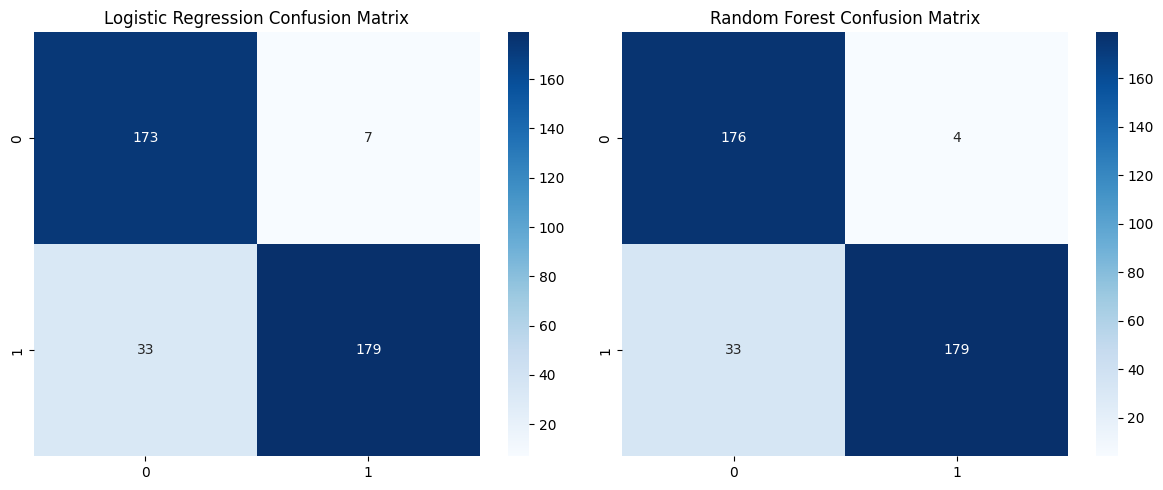

In [38]:
# Compare the accuracy of the models
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


# Confusion Matrix Comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

Random Forest performed slightly better in this task, especially in reducing false positives. Logistic regression is still a suitable choice if stronger model interpretability is required or if model deployment resources are limited.
If the goal is to minimize false positives while dealing with complex feature relationships, random forest is a better choice.